In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms.functional as TF
from tqdm import tqdm
import torch.optim as optim
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from collections import OrderedDict
import matplotlib.pyplot as plt
from Network import *
from DataSet import *
from train_procedure import *
from Aug import *
from torchvision import transforms
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
# Create the augmented dataset
create_augmented_dataset(True)

satImage_100.png: 100%|███████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.74image/s]


In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Test on one epoch

In [6]:
dict_train ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 1,
            "n_splits": 2,
            "batch_size": 10,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ReLU(inplace=True),
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 1e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment = {"param": dict_train}
experiment["convergence_path"] = run_training(dict_train) 

-------------------------- 1 fold --------------------------


KeyError: 'scale_channel'

In [7]:
f = open("result_exp/test.pkl","wb")
pickle.dump(experiment,f)
f.close()

## Experiment 1 Bis

In [8]:
dict_train1bis ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 10,
            "scale_channel": 2,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": True},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment1bis = {"param": dict_train1bis}
experiment1bis["convergence_path"] = run_training(dict_train1bis) 


f = open("result_exp/experiment1bis.pkl","wb")
pickle.dump(experiment1bis,f)
f.close()

-------------------------- 1 fold --------------------------


100%|█████████████████████████████████████████████████████████████████████| 110/110 [01:37<00:00,  1.12it/s, loss=0.44]


Training set: epoch-1 got 67295216/86240000 with acc 78.03%, F1-score 0.52 and loss 0.4898020029067993 
Validation set: epoch-1 got 70306260/86240000 with acc 81.52% , F1-score 0.46 and validation loss 0.4312519432432641


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.308]


Training set: epoch-2 got 73065796/86240000 with acc 84.72%, F1-score 0.61 and loss 0.3558947443962097 
Validation set: epoch-2 got 72330916/86240000 with acc 83.87% , F1-score 0.59 and validation loss 0.3989018167938913


100%|█████████████████████████████████████████████████████████████████████| 110/110 [01:30<00:00,  1.22it/s, loss=0.26]


Training set: epoch-3 got 75330774/86240000 with acc 87.35%, F1-score 0.67 and loss 0.29296618700027466 
Validation set: epoch-3 got 67881636/86240000 with acc 78.71% , F1-score 0.03 and validation loss 0.542205957778428


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:25<00:00,  1.29it/s, loss=0.251]


Training set: epoch-4 got 76365395/86240000 with acc 88.55%, F1-score 0.70 and loss 0.2662825584411621 
Validation set: epoch-4 got 70219104/86240000 with acc 81.42% , F1-score 0.20 and validation loss 0.4384279095289821


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:25<00:00,  1.29it/s, loss=0.192]


Training set: epoch-5 got 77920091/86240000 with acc 90.35%, F1-score 0.75 and loss 0.22784477472305298 
Validation set: epoch-5 got 72634139/86240000 with acc 84.22% , F1-score 0.42 and validation loss 0.3820228537944741


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:25<00:00,  1.29it/s, loss=0.232]


Training set: epoch-6 got 78478362/86240000 with acc 91.00%, F1-score 0.77 and loss 0.21480117738246918 
Validation set: epoch-6 got 73050788/86240000 with acc 84.71% , F1-score 0.44 and validation loss 0.3748160667405919


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.207]


Training set: epoch-7 got 78668421/86240000 with acc 91.22%, F1-score 0.78 and loss 0.21025437116622925 
Validation set: epoch-7 got 72428915/86240000 with acc 83.99% , F1-score 0.39 and validation loss 0.389691564002349


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.243]


Training set: epoch-8 got 78945234/86240000 with acc 91.54%, F1-score 0.79 and loss 0.20353545248508453 
Validation set: epoch-8 got 73051458/86240000 with acc 84.71% , F1-score 0.44 and validation loss 0.398284048793793


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:25<00:00,  1.28it/s, loss=0.204]


Training set: epoch-9 got 79141031/86240000 with acc 91.77%, F1-score 0.79 and loss 0.19779542088508606 
Validation set: epoch-9 got 73128678/86240000 with acc 84.80% , F1-score 0.44 and validation loss 0.38661266026932023


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.207]


Training set: epoch-10 got 79197748/86240000 with acc 91.83%, F1-score 0.79 and loss 0.19589565694332123 
Validation set: epoch-10 got 73555869/86240000 with acc 85.29% , F1-score 0.48 and validation loss 0.37596394843745556
-------------------------- 2 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.352]


Training set: epoch-1 got 63551889/86240000 with acc 73.69%, F1-score 0.49 and loss 0.5445088148117065 
Validation set: epoch-1 got 70949558/86240000 with acc 82.27% , F1-score 0.50 and validation loss 0.39573096376710726


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.288]


Training set: epoch-2 got 73665062/86240000 with acc 85.42%, F1-score 0.63 and loss 0.34648582339286804 
Validation set: epoch-2 got 70611421/86240000 with acc 81.88% , F1-score 0.51 and validation loss 0.3952429130111207


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.229]


Training set: epoch-3 got 75798523/86240000 with acc 87.89%, F1-score 0.68 and loss 0.2847352623939514 
Validation set: epoch-3 got 71650327/86240000 with acc 83.08% , F1-score 0.63 and validation loss 0.39290964388840194


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.227]


Training set: epoch-4 got 77114297/86240000 with acc 89.42%, F1-score 0.72 and loss 0.24916857481002808 
Validation set: epoch-4 got 70523831/86240000 with acc 81.78% , F1-score 0.65 and validation loss 0.38496496340743963


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.194]


Training set: epoch-5 got 78679339/86240000 with acc 91.23%, F1-score 0.78 and loss 0.21057532727718353 
Validation set: epoch-5 got 75627373/86240000 with acc 87.69% , F1-score 0.66 and validation loss 0.28281575872108833


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.201]


Training set: epoch-6 got 79106650/86240000 with acc 91.73%, F1-score 0.79 and loss 0.19999653100967407 
Validation set: epoch-6 got 75109910/86240000 with acc 87.09% , F1-score 0.71 and validation loss 0.29823872777787336


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.231]


Training set: epoch-7 got 79330496/86240000 with acc 91.99%, F1-score 0.80 and loss 0.19432304799556732 
Validation set: epoch-7 got 75531426/86240000 with acc 87.58% , F1-score 0.70 and validation loss 0.2901704261878676


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.178]


Training set: epoch-8 got 79519492/86240000 with acc 92.21%, F1-score 0.80 and loss 0.1892370879650116 
Validation set: epoch-8 got 76177191/86240000 with acc 88.33% , F1-score 0.69 and validation loss 0.270274881829656


100%|█████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.14]


Training set: epoch-9 got 79770589/86240000 with acc 92.50%, F1-score 0.81 and loss 0.18284834921360016 
Validation set: epoch-9 got 75866211/86240000 with acc 87.97% , F1-score 0.70 and validation loss 0.2797065741199769


100%|█████████████████████████████████████████████████████████████████████| 110/110 [01:24<00:00,  1.30it/s, loss=0.18]


Training set: epoch-10 got 79781198/86240000 with acc 92.51%, F1-score 0.81 and loss 0.1823093742132187 
Validation set: epoch-10 got 75664889/86240000 with acc 87.74% , F1-score 0.70 and validation loss 0.2861699562607764


## Experiment 2 Bis

In [9]:
dict_train2bis ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 10,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": True},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment2bis = {"param": dict_train2bis}
experiment2bis["convergence_path"] = run_training(dict_train2bis) 


f = open("result_exp/experiment2bis.pkl","wb")
pickle.dump(experiment2bis,f)
f.close()

-------------------------- 1 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.369]


Training set: epoch-1 got 67386610/86240000 with acc 78.14%, F1-score 0.52 and loss 0.5188770890235901 
Validation set: epoch-1 got 68890948/86240000 with acc 79.88% , F1-score 0.58 and validation loss 0.4925806600426642


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.297]


Training set: epoch-2 got 75399558/86240000 with acc 87.43%, F1-score 0.67 and loss 0.31971362233161926 
Validation set: epoch-2 got 74650486/86240000 with acc 86.56% , F1-score 0.68 and validation loss 0.31570611716620617


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.64it/s, loss=0.409]


Training set: epoch-3 got 77265120/86240000 with acc 89.59%, F1-score 0.74 and loss 0.2594798803329468 
Validation set: epoch-3 got 74736682/86240000 with acc 86.66% , F1-score 0.63 and validation loss 0.3143432709154686


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.64it/s, loss=0.243]


Training set: epoch-4 got 77725297/86240000 with acc 90.13%, F1-score 0.75 and loss 0.24029996991157532 
Validation set: epoch-4 got 73477729/86240000 with acc 85.20% , F1-score 0.71 and validation loss 0.3286071639353665


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.66it/s, loss=0.181]


Training set: epoch-5 got 78994724/86240000 with acc 91.60%, F1-score 0.79 and loss 0.20551250874996185 
Validation set: epoch-5 got 77936124/86240000 with acc 90.37% , F1-score 0.76 and validation loss 0.23350493419183896


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.66it/s, loss=0.213]


Training set: epoch-6 got 79359565/86240000 with acc 92.02%, F1-score 0.80 and loss 0.19669829308986664 
Validation set: epoch-6 got 78364513/86240000 with acc 90.87% , F1-score 0.76 and validation loss 0.21612870031613646


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.64it/s, loss=0.181]


Training set: epoch-7 got 79582780/86240000 with acc 92.28%, F1-score 0.81 and loss 0.19047635793685913 
Validation set: epoch-7 got 78232534/86240000 with acc 90.71% , F1-score 0.77 and validation loss 0.22421016737919602


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.64it/s, loss=0.169]


Training set: epoch-8 got 79735540/86240000 with acc 92.46%, F1-score 0.81 and loss 0.18575167655944824 
Validation set: epoch-8 got 78558045/86240000 with acc 91.09% , F1-score 0.78 and validation loss 0.21431607321627463


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.192]


Training set: epoch-9 got 79884706/86240000 with acc 92.63%, F1-score 0.82 and loss 0.1820145845413208 
Validation set: epoch-9 got 78365570/86240000 with acc 90.87% , F1-score 0.79 and validation loss 0.21565740684855925


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.64it/s, loss=0.189]


Training set: epoch-10 got 79966750/86240000 with acc 92.73%, F1-score 0.82 and loss 0.17985974252223969 
Validation set: epoch-10 got 78361848/86240000 with acc 90.86% , F1-score 0.79 and validation loss 0.21663065813784368
-------------------------- 2 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.404]


Training set: epoch-1 got 67067064/86240000 with acc 77.77%, F1-score 0.50 and loss 0.5402615666389465 
Validation set: epoch-1 got 70169165/86240000 with acc 81.36% , F1-score 0.45 and validation loss 0.4244539629816619


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.257]


Training set: epoch-2 got 74308205/86240000 with acc 86.16%, F1-score 0.64 and loss 0.345124751329422 
Validation set: epoch-2 got 73060571/86240000 with acc 84.72% , F1-score 0.48 and validation loss 0.3396980345308583


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.63it/s, loss=0.247]


Training set: epoch-3 got 76346943/86240000 with acc 88.53%, F1-score 0.71 and loss 0.28015565872192383 
Validation set: epoch-3 got 73110890/86240000 with acc 84.78% , F1-score 0.70 and validation loss 0.33845209623390554


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.63it/s, loss=0.275]


Training set: epoch-4 got 77316118/86240000 with acc 89.65%, F1-score 0.74 and loss 0.2503293454647064 
Validation set: epoch-4 got 74750975/86240000 with acc 86.68% , F1-score 0.66 and validation loss 0.326497401169799


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.178]


Training set: epoch-5 got 78315342/86240000 with acc 90.81%, F1-score 0.77 and loss 0.22290629148483276 
Validation set: epoch-5 got 76396646/86240000 with acc 88.59% , F1-score 0.75 and validation loss 0.2731922383241517


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.66it/s, loss=0.238]


Training set: epoch-6 got 78911261/86240000 with acc 91.50%, F1-score 0.79 and loss 0.20700977742671967 
Validation set: epoch-6 got 77085607/86240000 with acc 89.38% , F1-score 0.77 and validation loss 0.25483913805513947


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.187]


Training set: epoch-7 got 79193076/86240000 with acc 91.83%, F1-score 0.80 and loss 0.19971279799938202 
Validation set: epoch-7 got 77216241/86240000 with acc 89.54% , F1-score 0.77 and validation loss 0.24611854482727166


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.175]


Training set: epoch-8 got 79359892/86240000 with acc 92.02%, F1-score 0.80 and loss 0.19536417722702026 
Validation set: epoch-8 got 77887828/86240000 with acc 90.32% , F1-score 0.77 and validation loss 0.23307821427838654


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.64it/s, loss=0.189]


Training set: epoch-9 got 79507309/86240000 with acc 92.19%, F1-score 0.80 and loss 0.1915777325630188 
Validation set: epoch-9 got 77776183/86240000 with acc 90.19% , F1-score 0.78 and validation loss 0.2331628028994717


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:30<00:00,  3.65it/s, loss=0.148]


Training set: epoch-10 got 79623039/86240000 with acc 92.33%, F1-score 0.81 and loss 0.18831443786621094 
Validation set: epoch-10 got 77558907/86240000 with acc 89.93% , F1-score 0.77 and validation loss 0.2371431082278633


## Experiment 3 Bis

In [12]:
dict_train3bis ={"save_model": False,
            "cross_val": True,
            "skip_connection": True,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 10,
            "scale_channel": 0.5,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": True},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment3bis = {"param": dict_train3bis}
experiment3bis["convergence_path"] = run_training(dict_train3bis) 


f = open("result_exp/experiment3bis.pkl","wb")
pickle.dump(experiment3bis,f)
f.close()

-------------------------- 1 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [01:08<00:00,  1.61it/s, loss=0.415]


Training set: epoch-1 got 66008529/86240000 with acc 76.54%, F1-score 0.52 and loss 0.5053698420524597 
Validation set: epoch-1 got 70829109/86240000 with acc 82.13% , F1-score 0.55 and validation loss 0.4137656640656117


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.30it/s, loss=0.255]


Training set: epoch-2 got 75358463/86240000 with acc 87.38%, F1-score 0.69 and loss 0.33409568667411804 
Validation set: epoch-2 got 72900569/86240000 with acc 84.53% , F1-score 0.44 and validation loss 0.3748932588079257


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.30it/s, loss=0.228]


Training set: epoch-3 got 77632953/86240000 with acc 90.02%, F1-score 0.75 and loss 0.26222851872444153 
Validation set: epoch-3 got 76488715/86240000 with acc 88.69% , F1-score 0.73 and validation loss 0.2714620629081775


100%|█████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.29it/s, loss=0.27]


Training set: epoch-4 got 78411664/86240000 with acc 90.92%, F1-score 0.77 and loss 0.23347149789333344 
Validation set: epoch-4 got 75545471/86240000 with acc 87.60% , F1-score 0.73 and validation loss 0.30914618849227266


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.29it/s, loss=0.197]


Training set: epoch-5 got 79493447/86240000 with acc 92.18%, F1-score 0.80 and loss 0.20306727290153503 
Validation set: epoch-5 got 77335952/86240000 with acc 89.68% , F1-score 0.77 and validation loss 0.249884892849506


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.27it/s, loss=0.162]


Training set: epoch-6 got 79807757/86240000 with acc 92.54%, F1-score 0.81 and loss 0.1943732053041458 
Validation set: epoch-6 got 77412366/86240000 with acc 89.76% , F1-score 0.77 and validation loss 0.24998087962154783


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.24it/s, loss=0.174]


Training set: epoch-7 got 79917612/86240000 with acc 92.67%, F1-score 0.82 and loss 0.19061581790447235 
Validation set: epoch-7 got 77523919/86240000 with acc 89.89% , F1-score 0.77 and validation loss 0.24843785070696559


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.31it/s, loss=0.202]


Training set: epoch-8 got 79993269/86240000 with acc 92.76%, F1-score 0.82 and loss 0.1879340410232544 
Validation set: epoch-8 got 78445199/86240000 with acc 90.96% , F1-score 0.79 and validation loss 0.2225053340581062


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.31it/s, loss=0.227]


Training set: epoch-9 got 80072831/86240000 with acc 92.85%, F1-score 0.82 and loss 0.1854344606399536 
Validation set: epoch-9 got 78202057/86240000 with acc 90.68% , F1-score 0.79 and validation loss 0.2296912443359427


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.28it/s, loss=0.153]


Training set: epoch-10 got 80172242/86240000 with acc 92.96%, F1-score 0.82 and loss 0.18326494097709656 
Validation set: epoch-10 got 78142737/86240000 with acc 90.61% , F1-score 0.79 and validation loss 0.23070693086645191
-------------------------- 2 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:21<00:00,  5.23it/s, loss=0.493]


Training set: epoch-1 got 61861205/86240000 with acc 71.73%, F1-score 0.50 and loss 0.6050620079040527 
Validation set: epoch-1 got 69196662/86240000 with acc 80.24% , F1-score 0.44 and validation loss 0.48524797576327927


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.30it/s, loss=0.296]


Training set: epoch-2 got 74865336/86240000 with acc 86.81%, F1-score 0.69 and loss 0.38245490193367004 
Validation set: epoch-2 got 72837545/86240000 with acc 84.46% , F1-score 0.58 and validation loss 0.3679713108379665


100%|█████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.28it/s, loss=0.24]


Training set: epoch-3 got 77309100/86240000 with acc 89.64%, F1-score 0.74 and loss 0.2870115637779236 
Validation set: epoch-3 got 74419989/86240000 with acc 86.29% , F1-score 0.57 and validation loss 0.32902434853633056


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.30it/s, loss=0.222]


Training set: epoch-4 got 78292107/86240000 with acc 90.78%, F1-score 0.77 and loss 0.24647486209869385 
Validation set: epoch-4 got 76312108/86240000 with acc 88.49% , F1-score 0.72 and validation loss 0.289588917280815


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.30it/s, loss=0.236]


Training set: epoch-5 got 79336846/86240000 with acc 92.00%, F1-score 0.80 and loss 0.2147558629512787 
Validation set: epoch-5 got 76997737/86240000 with acc 89.28% , F1-score 0.75 and validation loss 0.2690468635968851


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.29it/s, loss=0.194]


Training set: epoch-6 got 79607065/86240000 with acc 92.31%, F1-score 0.81 and loss 0.206960991024971 
Validation set: epoch-6 got 77115758/86240000 with acc 89.42% , F1-score 0.76 and validation loss 0.2677129562940927


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:20<00:00,  5.30it/s, loss=0.259]


Training set: epoch-7 got 79769819/86240000 with acc 92.50%, F1-score 0.81 and loss 0.20248033106327057 
Validation set: epoch-7 got 76856764/86240000 with acc 89.12% , F1-score 0.76 and validation loss 0.273163020730454


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:21<00:00,  5.24it/s, loss=0.193]


Training set: epoch-8 got 79857097/86240000 with acc 92.60%, F1-score 0.82 and loss 0.19900864362716675 
Validation set: epoch-8 got 75734321/86240000 with acc 87.82% , F1-score 0.74 and validation loss 0.29487189717044826


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:21<00:00,  5.08it/s, loss=0.172]


Training set: epoch-9 got 80066046/86240000 with acc 92.84%, F1-score 0.82 and loss 0.19317227602005005 
Validation set: epoch-9 got 76363853/86240000 with acc 88.55% , F1-score 0.75 and validation loss 0.28141468537508724


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:21<00:00,  5.06it/s, loss=0.193]


Training set: epoch-10 got 80109798/86240000 with acc 92.89%, F1-score 0.82 and loss 0.19218505918979645 
Validation set: epoch-10 got 76487427/86240000 with acc 88.69% , F1-score 0.76 and validation loss 0.27853192688010264


## Experiment 4 Bis

In [11]:
dict_train4bis ={"save_model": False,
            "cross_val": True,
            "skip_connection": False,
            "num_epochs": 10,
            "n_splits": 2,
            "batch_size": 10,
            "scale_channel": 0.5,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": True},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": None,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "StepLR",
            "scheduler": torch.optim.lr_scheduler.StepLR,
            "param_scheduler": {"step_size": 4,
                               "gamma": 0.1},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }


experiment4bis = {"param": dict_train4bis}
experiment4bis["convergence_path"] = run_training(dict_train4bis) 


f = open("result_exp/experiment4bis.pkl","wb")
pickle.dump(experiment4bis,f)
f.close()

-------------------------- 1 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:17<00:00,  6.15it/s, loss=0.422]


Training set: epoch-1 got 62703525/86240000 with acc 72.71%, F1-score 0.51 and loss 0.5799912214279175 
Validation set: epoch-1 got 71940812/86240000 with acc 83.42% , F1-score 0.60 and validation loss 0.47076091765545375


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:18<00:00,  5.94it/s, loss=0.316]


Training set: epoch-2 got 74428402/86240000 with acc 86.30%, F1-score 0.67 and loss 0.3751053214073181 
Validation set: epoch-2 got 71377043/86240000 with acc 82.77% , F1-score 0.66 and validation loss 0.386380387161375


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.70it/s, loss=0.281]


Training set: epoch-3 got 76540466/86240000 with acc 88.75%, F1-score 0.72 and loss 0.2939181625843048 
Validation set: epoch-3 got 72063556/86240000 with acc 83.56% , F1-score 0.67 and validation loss 0.3906484943605947


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.72it/s, loss=0.254]


Training set: epoch-4 got 77294682/86240000 with acc 89.63%, F1-score 0.74 and loss 0.26356041431427 
Validation set: epoch-4 got 73454501/86240000 with acc 85.17% , F1-score 0.71 and validation loss 0.3366929440082486


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.69it/s, loss=0.175]


Training set: epoch-5 got 78587413/86240000 with acc 91.13%, F1-score 0.78 and loss 0.22415243089199066 
Validation set: epoch-5 got 75010106/86240000 with acc 86.98% , F1-score 0.73 and validation loss 0.3012547252230022


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.68it/s, loss=0.232]


Training set: epoch-6 got 78842496/86240000 with acc 91.42%, F1-score 0.79 and loss 0.21738074719905853 
Validation set: epoch-6 got 75728444/86240000 with acc 87.81% , F1-score 0.74 and validation loss 0.28360339102763643


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.69it/s, loss=0.194]


Training set: epoch-7 got 79004997/86240000 with acc 91.61%, F1-score 0.79 and loss 0.21293051540851593 
Validation set: epoch-7 got 74937542/86240000 with acc 86.89% , F1-score 0.73 and validation loss 0.30317684417683693


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.70it/s, loss=0.193]


Training set: epoch-8 got 79169465/86240000 with acc 91.80%, F1-score 0.80 and loss 0.2082342803478241 
Validation set: epoch-8 got 75639570/86240000 with acc 87.71% , F1-score 0.74 and validation loss 0.28632920301487674


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.64it/s, loss=0.186]


Training set: epoch-9 got 79355466/86240000 with acc 92.02%, F1-score 0.80 and loss 0.2042076587677002 
Validation set: epoch-9 got 75178504/86240000 with acc 87.17% , F1-score 0.74 and validation loss 0.2951547440207926


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.70it/s, loss=0.177]


Training set: epoch-10 got 79348739/86240000 with acc 92.01%, F1-score 0.80 and loss 0.20363971590995789 
Validation set: epoch-10 got 74631603/86240000 with acc 86.54% , F1-score 0.73 and validation loss 0.3082501178665873
-------------------------- 2 fold --------------------------


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.70it/s, loss=0.415]


Training set: epoch-1 got 66651168/86240000 with acc 77.29%, F1-score 0.54 and loss 0.5385973453521729 
Validation set: epoch-1 got 73504297/86240000 with acc 85.23% , F1-score 0.58 and validation loss 0.47347917954758684


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.72it/s, loss=0.294]


Training set: epoch-2 got 74996693/86240000 with acc 86.96%, F1-score 0.68 and loss 0.36658966541290283 
Validation set: epoch-2 got 74538104/86240000 with acc 86.43% , F1-score 0.66 and validation loss 0.3803842521506172


100%|█████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.68it/s, loss=0.27]


Training set: epoch-3 got 76256383/86240000 with acc 88.42%, F1-score 0.71 and loss 0.30861395597457886 
Validation set: epoch-3 got 63255147/86240000 with acc 73.35% , F1-score 0.58 and validation loss 0.5420279701490962


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.69it/s, loss=0.266]


Training set: epoch-4 got 77473625/86240000 with acc 89.83%, F1-score 0.75 and loss 0.2615646421909332 
Validation set: epoch-4 got 67232602/86240000 with acc 77.96% , F1-score 0.64 and validation loss 0.4747996418068503


100%|██████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.61it/s, loss=0.2]


Training set: epoch-5 got 78643162/86240000 with acc 91.19%, F1-score 0.78 and loss 0.22846239805221558 
Validation set: epoch-5 got 68988385/86240000 with acc 80.00% , F1-score 0.66 and validation loss 0.4223777299087447


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.59it/s, loss=0.216]


Training set: epoch-6 got 78904606/86240000 with acc 91.49%, F1-score 0.79 and loss 0.22030916810035706 
Validation set: epoch-6 got 74257041/86240000 with acc 86.11% , F1-score 0.73 and validation loss 0.3206287048538813


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.62it/s, loss=0.183]


Training set: epoch-7 got 79052998/86240000 with acc 91.67%, F1-score 0.79 and loss 0.21534128487110138 
Validation set: epoch-7 got 72236903/86240000 with acc 83.76% , F1-score 0.70 and validation loss 0.3529465011179381


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.69it/s, loss=0.223]


Training set: epoch-8 got 79245202/86240000 with acc 91.89%, F1-score 0.80 and loss 0.21037229895591736 
Validation set: epoch-8 got 72132613/86240000 with acc 83.64% , F1-score 0.70 and validation loss 0.3595542837810704


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.70it/s, loss=0.184]


Training set: epoch-9 got 79336864/86240000 with acc 92.00%, F1-score 0.80 and loss 0.20706258714199066 
Validation set: epoch-9 got 69988262/86240000 with acc 81.16% , F1-score 0.67 and validation loss 0.4074612536286941


100%|████████████████████████████████████████████████████████████████████| 110/110 [00:19<00:00,  5.69it/s, loss=0.184]


Training set: epoch-10 got 79383110/86240000 with acc 92.05%, F1-score 0.80 and loss 0.20612388849258423 
Validation set: epoch-10 got 69458603/86240000 with acc 80.54% , F1-score 0.67 and validation loss 0.4162825049875025


In [3]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)


    
exp_bis = {}

for i in range(1,3):
    f = open(f"result_exp/experiment{i}bis.pkl","rb")
    exp_bis[f"exp{i}"] = CPU_Unpickler(f).load()
    f.close()

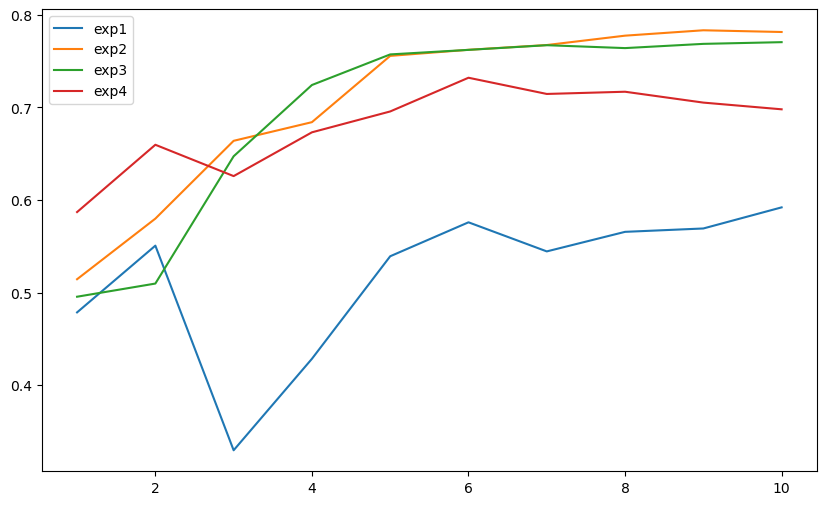

In [6]:
fig = plt.figure(figsize=(10,6))
label = [f"exp{i+1}" for i in range(3)]
for i in range(1,1+len(exp_bis)):
    y = 0.5*(np.array(exp_bis[f"exp{i}"]["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp_bis[f"exp{i}"]["convergence_path"]["Kfold 1"]["val_F1"]))
    plt.plot(np.arange(1,len(y)+1),y,label=label[i-1])
plt.legend()
plt.show()

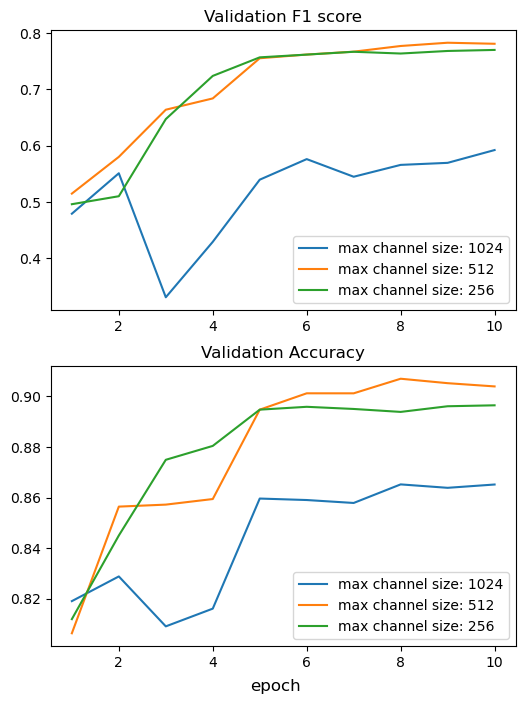

In [13]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

exp = {}

for i in range(1,4):
    f = open(f"result_exp/experiment{i}bis.pkl","rb")
    exp[f"exp{i}"] = CPU_Unpickler(f).load()
    f.close()


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8))
label = ['max channel size: 1024','max channel size: 512','max channel size: 256']
for i in range(1,1+len(exp)):
    y = 0.5*(np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 0"]["val_F1"]) + np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 1"]["val_F1"]))
    ax1.plot(np.arange(1,len(y)+1),y,label=label[i-1])
    y = 0.5*(np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 0"]["val_acc"]) + np.array(exp[f"exp{i}"]["convergence_path"]["Kfold 1"]["val_acc"]))
    ax2.plot(np.arange(1,len(y)+1),y,'-',label=label[i-1])
ax2.legend()
ax1.legend()
ax1.set_title('Validation F1 score')
ax2.set_title('Validation Accuracy')
fig.supxlabel('epoch',y=0.05)
plt.savefig('Figure/val_acc_2.pdf', dpi=300, bbox_inches='tight')
plt.show()